# Part 2: Median Household Income Distribution

Next, we duplicated the process of part 1 (demographics) for median household income to see if similar patterns persist

Like part 1, we need to import relevant data libraries (pandas, geopandas, folium, matplotlib, and contextily)

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx

# Cleaning up the data
## Open Data DC - Income data (median household income) by ward
First, we need to explore our data (from Open Data DC) and trim it to make sure that we can merge data where needed

In order to explore data, we'll input data from Open Data DC looking at income by ward

In [2]:
income= gpd.read_file('econ_ward.geojson') # import the data

Let's check out the column names of the data, since some of the columns from the demographic data had funky names

In [3]:
income.head(2)

,OBJECTID,STATEFP,SLDUST,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,NAME,...,DP03_0131P,DP03_0132P,DP03_0133P,DP03_0134P,DP03_0135P,DP03_0136P,DP03_0137P,SHAPEAREA,SHAPELEN,geometry
0,1,11,002,11002,Ward 2,16573627,5928027,+38.8926196,-077.0427418,"Ward 2, District of Columbia",...,5.9,9.5,13.6,14.2,10.2,3.5,18.6,0,0,"POLYGON ((-77.08171 38.91744, -77.08173 38.917..."
1,2,11,008,11008,Ward 8,22429470,8473345,+38.8390139,-077.0071260,"Ward 8, District of Columbia",...,36.8,40.9,26.3,26.4,25.5,29.0,34.7,0,0,"POLYGON ((-77.04801 38.84127, -77.04802 38.841..."


Again these titles are weird... Let's view all column names to see what we're working with

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
income.head(2)

,OBJECTID,STATEFP,SLDUST,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,NAME,DP03_0001,DP03_0002,DP03_0003,DP03_0004,DP03_0005,DP03_0006,DP03_0007,DP03_0008,DP03_0009P,DP03_0010,DP03_0011,DP03_0012,DP03_0013,DP03_0014,DP03_0015,DP03_0016,DP03_0017,DP03_0018,DP03_0019,DP03_0020,DP03_0021,DP03_0022,DP03_0023,DP03_0024,DP03_0025,DP03_0026,DP03_0027,DP03_0028,DP03_0029,DP03_0030,DP03_0031,DP03_0032,DP03_0033,DP03_0034,DP03_0035,DP03_0036,DP03_0037,DP03_0038,DP03_0039,DP03_0040,DP03_0041,DP03_0042,DP03_0043,DP03_0044,DP03_0045,DP03_0046,DP03_0047,DP03_0048,DP03_0049,DP03_0050,DP03_0051,DP03_0052,DP03_0053,DP03_0054,DP03_0055,DP03_0056,DP03_0057,DP03_0058,DP03_0059,DP03_0060,DP03_0061,DP03_0062,DP03_0063,DP03_0064,DP03_0065,DP03_0066,DP03_0067,DP03_0068,DP03_0069,DP03_0070,DP03_0071,DP03_0072,DP03_0073,DP03_0074,DP03_0075,DP03_0076,DP03_0077,DP03_0078,DP03_0079,DP03_0080,DP03_0081,DP03_0082,DP03_0083,DP03_0084,DP03_0085,DP03_0086,DP03_0087,DP03_0088,DP03_0089,DP03_0090,DP03_0091,DP03_0092,DP03_0093,DP03_0094,DP03_0095,DP03_0096,DP03_0097,DP03_0098,DP03_0099,DP03_0100,DP03_0101,DP03_0102,DP03_0103,DP03_0104,DP03_0105,DP03_0106,DP03_0107,DP03_0108,DP03_0109,DP03_0110,DP03_0111,DP03_0112,DP03_0113,DP03_0114,DP03_0115,DP03_0116,DP03_0117,DP03_0118,DP03_0119P,DP03_0120P,DP03_0121P,DP03_0122P,DP03_0123P,DP03_0124P,DP03_0125P,DP03_0126P,DP03_0127P,DP03_0128P,DP03_0129P,DP03_0130P,DP03_0131P,DP03_0132P,DP03_0133P,DP03_0134P,DP03_0135P,DP03_0136P,DP03_0137P,SHAPEAREA,SHAPELEN,geometry
0,1,11,002,11002,Ward 2,16573627,5928027,+38.8926196,-077.0427418,"Ward 2, District of Columbia",74203,52550,52284,50504,1780,266,21653,52284,3.4,38367,26815,26705,25743,2366,1697,1456,1102,49864,8382,1050,11299,18760,3813,6560,23.9,50504,39246,3353,6980,327,598,50504,46,803,577,257,1476,425,1937,4913,15851,8703,3080,4968,7468,50504,38057,10359,1956,132,38857,2611,831,1231,1224,1695,4752,4064,7752,4342,10355,114649,165977,33658,166783,5735,20729,4337,52421,693,9305,150,3809,1335,9337,115,23,190,121,232,501,496,1387,1258,5014,212937,269705,85777,29520,100006,131992,70133,108056,87384,77425,75644,70048,11674,1781,6836,20,62065,48273,46608,45476,44474,1317,1132,1665,1554,1232,332,111,13792,13308,11972,1760,484,2.8,5.1,0.0,2.0,3.9,0.0,17.8,21.5,0.0,13.3,7.4,7.4,5.9,9.5,13.6,14.2,10.2,3.5,18.6,0,0,"POLYGON ((-77.08171 38.91744, -77.08173 38.917..."
1,2,11,008,11008,Ward 8,22429470,8473345,+38.8390139,-077.0071260,"Ward 8, District of Columbia",61808,38346,36998,30560,6438,1348,23462,36998,17.4,34588,20986,20823,17360,9476,6921,14322,10382,31111,14130,2133,11568,1023,727,1530,36.0,30560,10332,8488,7368,1358,3014,30560,59,1451,285,505,2700,2450,379,1678,4557,6231,4451,1801,4013,30560,21766,8161,603,30,32194,5473,2672,3480,3522,4450,3834,2941,3013,1552,1257,37963,62260,23049,70274,7543,11331,4651,30040,3986,9384,2900,3411,11237,16493,2381,1027,1589,1676,2341,2302,1801,1759,953,664,43617,66731,25573,15701,32092,54725,33644,43856,50195,82781,79410,34745,52653,3371,26402,365,47888,34780,28821,27239,18672,10357,1582,5959,5403,1158,4613,556,13108,12243,3205,10129,865,26.2,34.7,31.9,6.9,8.3,2.2,35.3,43.0,35.9,30.4,39.8,39.5,36.8,40.9,26.3,26.4,25.5,29.0,34.7,0,0,"POLYGON ((-77.04801 38.84127, -77.04802 38.841..."


Again, lots of confusing titles! Let's switch rename the relevant columns that we'll be keeping later on

In [5]:
# rename "NAMELSAD" to "WARD" to be consistent with gsl data for merging
income.rename(columns={'NAMELSAD':'WARD'}, inplace=True),
income.rename(columns={'INTPTLAT':'LATITUDE'}, inplace=True),
income.rename(columns={'INTPTLON':'LONGITUDE'}, inplace=True),
income.rename(columns={'DP03_0051':'Total Households'}, inplace=True),
income.rename(columns={'DP03_0086':'Median Household Income'}, inplace=True),
income.tail(1)

,OBJECTID,STATEFP,SLDUST,GEOID,WARD,ALAND,AWATER,LATITUDE,LONGITUDE,NAME,DP03_0001,DP03_0002,DP03_0003,DP03_0004,DP03_0005,DP03_0006,DP03_0007,DP03_0008,DP03_0009P,DP03_0010,DP03_0011,DP03_0012,DP03_0013,DP03_0014,DP03_0015,DP03_0016,DP03_0017,DP03_0018,DP03_0019,DP03_0020,DP03_0021,DP03_0022,DP03_0023,DP03_0024,DP03_0025,DP03_0026,DP03_0027,DP03_0028,DP03_0029,DP03_0030,DP03_0031,DP03_0032,DP03_0033,DP03_0034,DP03_0035,DP03_0036,DP03_0037,DP03_0038,DP03_0039,DP03_0040,DP03_0041,DP03_0042,DP03_0043,DP03_0044,DP03_0045,DP03_0046,DP03_0047,DP03_0048,DP03_0049,DP03_0050,Total Households,DP03_0052,DP03_0053,DP03_0054,DP03_0055,DP03_0056,DP03_0057,DP03_0058,DP03_0059,DP03_0060,DP03_0061,DP03_0062,DP03_0063,DP03_0064,DP03_0065,DP03_0066,DP03_0067,DP03_0068,DP03_0069,DP03_0070,DP03_0071,DP03_0072,DP03_0073,DP03_0074,DP03_0075,DP03_0076,DP03_0077,DP03_0078,DP03_0079,DP03_0080,DP03_0081,DP03_0082,DP03_0083,DP03_0084,DP03_0085,Median Household Income,DP03_0087,DP03_0088,DP03_0089,DP03_0090,DP03_0091,DP03_0092,DP03_0093,DP03_0094,DP03_0095,DP03_0096,DP03_0097,DP03_0098,DP03_0099,DP03_0100,DP03_0101,DP03_0102,DP03_0103,DP03_0104,DP03_0105,DP03_0106,DP03_0107,DP03_0108,DP03_0109,DP03_0110,DP03_0111,DP03_0112,DP03_0113,DP03_0114,DP03_0115,DP03_0116,DP03_0117,DP03_0118,DP03_0119P,DP03_0120P,DP03_0121P,DP03_0122P,DP03_0123P,DP03_0124P,DP03_0125P,DP03_0126P,DP03_0127P,DP03_0128P,DP03_0129P,DP03_0130P,DP03_0131P,DP03_0132P,DP03_0133P,DP03_0134P,DP03_0135P,DP03_0136P,DP03_0137P,SHAPEAREA,SHAPELEN,geometry
7,8,11,003,11003,Ward 3,26946477,1316331,+38.9383001,-077.0781397,"Ward 3, District of Columbia",71845,50513,50383,48421,1962,130,21332,50383,3.9,40098,27539,27539,26387,5114,4476,8500,6542,47756,17616,1927,14093,3789,2450,7881,28.6,48421,38375,3497,5595,446,508,48421,40,761,449,309,1282,349,2025,3871,13102,10456,2783,4598,8396,48421,33138,11610,3529,144,37508,1957,794,1098,1243,1428,4079,4016,6481,4172,12240,129681,204952,30660,203135,8488,24994,7711,57667,477,8300,312,4291,625,17312,282,94,123,136,118,822,923,2348,2411,10055,236960,318022,94151,20196,82918,104704,75225,122386,91619,84214,82791,75982,17700,1423,15421,219,53869,45165,43517,42765,41566,1568,752,1648,1605,1365,278,43,8704,8354,7418,1138,350,2.3,1.9,1.6,1.2,1.1,0.0,8.6,3.2,19.0,8.0,1.8,1.6,1.1,1.8,9.3,10.4,5.4,2.1,17.9,0,0,"POLYGON ((-77.11975 38.93436, -77.11976 38.934..."


Looks good! Now let's make sure our demographic data is in the right projection

In [6]:
income.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We're in the wrong projection so let's change that!

In [7]:
income_wm = income.to_crs(epsg=3857) #change projection

We don't need most of the columns in the data set. Let's define the columns we need and trim the data to keep only the necessary columns. We'll also perform a head function to make sure it worked

In [8]:
income_columns_keep=['WARD','LATITUDE','LONGITUDE','Median Household Income','geometry']

In [9]:
income_trimmed = income_wm[income_columns_keep].copy() #create new data frame with trimmed data
income_trimmed = income_trimmed.dropna()
income_trimmed.head(3)

,WARD,LATITUDE,LONGITUDE,Median Household Income,geometry
0,Ward 2,+38.8926196,-077.0427418,212937,"POLYGON ((-8580696.853 4709851.992, -8580698.4..."
1,Ward 8,+38.8390139,-077.0071260,43617,"POLYGON ((-8576945.384 4698960.838, -8576946.6..."
2,Ward 6,+38.8866683,-077.0028435,169889,"POLYGON ((-8575142.899 4704858.627, -8575203.4..."


We can see all of the columns we need! Let's check out the trimmed data frame just to make sure

In [10]:
income_trimmed.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   WARD                     8 non-null      object  
 1   LATITUDE                 8 non-null      object  
 2   LONGITUDE                8 non-null      object  
 3   Median Household Income  8 non-null      int64   
 4   geometry                 8 non-null      geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 448.0+ bytes


Now there's only the 5 columns we need. Great!

Now, we're able to map the median household income by ward. We'll add a legend, lock it in place to the right of the map, chose a scheme, and make the data opaque over the basemap. We'll also create a title and remove the axis 

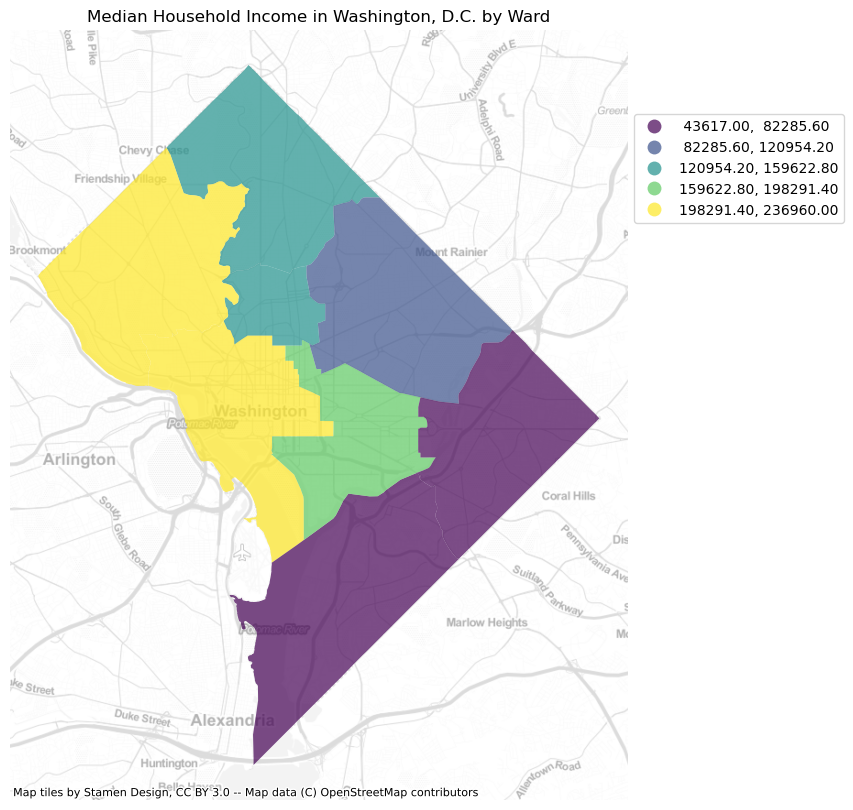

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
income_trimmed.plot(figsize=(12,10), # plot the data
                 column='Median Household Income',
                 legend=True, 
                 ax=ax,
                 legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                 scheme='equal_interval', alpha=0.7)         
ax.set_title('Median Household Income in Washington, D.C. by Ward') # set axis title
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )
ax.set_axis_off() # remove axis

In [18]:
fig.write(html)("income_static.html")

AttributeError: 'Figure' object has no attribute 'save_html'

This map shows that the SE quadrant of D.C. has the lowest median household income. More specifically, wards 7 and 8 in the SE have the lowest median household income. Similar to the demographic distribution in part 1, there is a stark divide between east and west, where there is a significantly lower median household income in eastern wards of the city compared to western wards. 

## Open Data DC - Data on Food (Grocery Stores and Healthy Corner Stores)
We need to duplicate the data wrangling we did for food data in part 1. So again, Next, we';; trim the data to make sure that we can merge data where needed

In order to explore data, we'll input my data from Open Data DC

We don't need to run as many diagnostics since we just did that in part 1. We'll go ahead and run the basic, necessary functions.

In [ ]:
gsl = pd.read_csv('Grocery_Store_Locations.csv') # import the data

We definitely need to create the new column "store type"

In [ ]:
gsl['STORE TYPE']= 'Grocery store' # create a new column "store type"

Like last time, we need to subset the data, trimming it to keep the relevant columns

In [ ]:
# subset the data
desired_columns= ['X','Y','STORENAME','WARD', 'STORE TYPE']
gsl_trimmed = gsl[desired_columns].copy()
gsl_trimmed = gsl_trimmed.dropna()
gsl_trimmed.sample(1)

Next, we'll repeat this process for healthy corner stores. Like for grocery stores, we really don't need to run as many function because we are simply repeating the same process in part 1. So, we'll only execute the necessary functions

In [ ]:
healthy= pd.read_csv('Healthy_Corner_Stores.csv') # import healthy corner store data

We definitely need to rename "store" to "storename" to match grocery store location's title for stores, since we're merging them soon

We'll run a tail to make sure it worked

In [ ]:
# rename "store" to "storename" to be consistent with gsl data for merging
healthy.rename(columns={'STORE':'STORENAME'}, inplace=True)
healthy.tail(1)

Next, we need to add the store type (like for grocery stores) to distinguish the store type when merging the two data sets

In [ ]:
healthy['STORE TYPE']= 'Healthy corner store' # add a new column with the input "healthy corner store"

This let me create a new column, store type, with all entries being healthy corner store

Like with grocery store locations, we only need a few relevant columns, so we'll trim the data accordingly

In [ ]:
# subset the data
desired_columns_healthy= ['X','Y','STORENAME','STORE TYPE'] # only keep the necessary columns
healthy[desired_columns_healthy].sample(3)
healthy_trimmed = healthy[desired_columns_healthy].copy()
healthy_trimmed = healthy_trimmed.dropna()
healthy_trimmed.sample(3)

When we ran a sample, we can see that the trimmed data only has the columns we wanted: X,Y, storename, and store type

Next, just like in part 1, we will merge the two data sets we just trimmed (grocery store locations and healthy corner stores) because we're hoping to map both of these data sets together

In [ ]:
all_stores= pd.concat([gsl_trimmed, healthy_trimmed], axis=0) # merge the data using the concatenation function
all_stores.sample(3) # make sure the concatenation worked

We can see different stores with different store types, so we know it worked

Now, onto mapping:

## Mapping store locations (grocery stores and healthy corner stores) in D.C. based on median household income

We're going to create the same interactive Choropleth map we did in part 1, but this time for median household income. We're going to also add the all_stores data (grocery stores and healthy corner stores) and create a legend to distinguish between the two

First, import the basemap from folium

Next, use a for loop to add markers to the store locations so that we can map them. So far, this is the same process used in part 1

In [ ]:
# import basemap from folium
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')
# loop to add markers to the store locations 
for index, row in all_stores.iterrows():
    print(row.STORENAME, row.X, row.Y)

This function printed the name of the store with the X,Y coordinates

Next, we'll develop the same Choropleth map that is interactive, but this time projecting median household income in Washington D.C. by ward. We'll use a for loop to do this. Rather than using the merged data (all_stores), we'll ensure that the markers are different colors based on store type. So, we'll use the trimmed gsl and healthy stores data sets and set different colors to their markers

In [ ]:
# create choropleth map for percent black population in census tracts
folium.Choropleth(
                  geo_data=income_trimmed, 
                  data=income_trimmed,         
                  key_on='feature.properties.WARD', 
                  columns=['WARD', 'Median Household Income'], 
                  fill_color='PuBuGn',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)},
                  legend_name='Median Household Income').add_to(m)
for index, row in gsl_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='white',icon_color='black')).add_to(m)
for index, row in healthy_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='black')).add_to(m)
# create a legend
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:white;opacity:0.7;'></span>Grocery Stores</li>
    <li><span style='background:Black;opacity:0.7;'></span>Healthy Corner Stores</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m

Like in part 1, this map shows the store locations, differentiated between grocery stores and healthy corner stores by color, in Washington D.C. However, it is different because this map highlights median household income by ward. This helps us understand the spatial distribution of different types of food access based on income.

We can see that there are way more healthy corner stores, which are likely less accessible (since they're more expensive) and far fewer full-fledged grocery stores in areas with lower income wards. This is expected, knowing what we know about the link between race and income, where high concentrations of black folks in wards are the same areas with lowest median income. This means we can see the same relationship for high percent black wards as low median household income, where there seems to be less access to food. While there are many healthy corner stores, many of these corner stores do not provide as much food access as grocery stores, located in high income areas. Many of these healthy corner stores are stores like CVS. This is something we hope to explore further to see what it really means to have meaningful access to healthy food in DC for low income folks and people of color.

# Add a function and a loop

Finally, just like in part 1, we will develop a function to cluster all store types so that we can see general concentrations of stores in an interactive choropleth map. When zooming in, we can begin to see smaller pockets of food concentrations and general store distribution.

We then created a for loop for all wards when clustering.

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[all_stores['Y'].mean(), all_stores['X'].mean()],zoom_start=12)
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m2=folium.FeatureGroup(name= "All Stores").add_to(m)

marker_cluster = MarkerCluster(
name= "Cluster Map"
).add_to(m2)

for row in all_stores.itertuples():
    location=row.Y, row.X
    popup=row.STORENAME
    marker=folium.Marker(location=location,popup=popup)
    marker_cluster.add_child(marker)

folium.Choropleth(
                  geo_data=income_trimmed,
                  name= "Median Household Income",
                  data=income_trimmed,         
                  key_on='feature.properties.WARD', 
                  columns=['WARD', 'Median Household Income'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, 
                  legend_name='Median Household Income').add_to(m) 

folium.LayerControl().add_to(m)
m

From this function, we can see that there is certainly greater dispersion of food access, in that stores are located further away from each other, in low income wards. It's important to really dive deep into what types of stores are available to low income wards, because when clicking on specific stores, there is far less access to quality food options (like grocery stores) in these wards. Part 3 dives into this issue further by charting grocery store counts and liquor stores, even looking at a more granular level than DC by assessing zip codes. 


# Mapping the existing food landscape in Washington D.C.
We have a sense of where grocery stores are located in the city, and we can see that there is a disparity based on both race (from Part 1) and income as it relates to food access. While grocery store locations are a critical component for food access, we know that food access goes beyond just grocery stores. So, we want to consider other locations that can provide food access in the city. This includes: farmer's markets and community gardens. Our higher goal in assessing the existing food landscape in D.C. is to understand specifically healthy food access. We know that places with food deserts, and thus less access to healthy food, may still have access to unhealthy foods and beverages. As such, we incorporated Open Data DC's available data on locations with liquor licenses, as we are curious to see if there is more access to alcohol in low food access areas.

First, we need to import our data on farmer's markets, liquor licenses, and community gardens. We want to overlay these locations on top of DC wards, so we also need to import ward data

In [ ]:
farmers= pd.read_csv('Farmers_Market_Locations.csv') # import the data

In [ ]:
wards= gpd.read_file('Wards_from_2022.geojson') # import the data
liquor= pd.read_csv('Liquor_Licenses.csv')
gardens=pd.read_csv('Community_Gardens.csv')

We will run a head function on these new data sets so that we know the column names, which are important when mapping. We actually don't need to clean the data, because we know exactly what columns we need: X, Y, and any column indicating the name of the location.

In [ ]:
farmers.head(1)

In [ ]:
liquor.head(2)

In [ ]:
gardens.head(1)

Finally, we can map the existing food landscape in DC!

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[all_stores['Y'].mean(), all_stores['X'].mean()],zoom_start=12)
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m2=folium.FeatureGroup(name= "Grocery Stores").add_to(m)
for index, row in gsl_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='black',icon_color='white', icon='shopping-cart')).add_to(m2)

m3=folium.FeatureGroup(name= "Farmers Markets").add_to(m)
for index, row in farmers.iterrows():
    folium.Marker([row.Y, row.X], popup=row.NAME, tooltip=row.NAME, icon=folium.Icon(color='pink', icon='cutlery')).add_to(m3)

m4=folium.FeatureGroup(name= "Liquor Licenses").add_to(m)
for index, row in liquor.iterrows():
    folium.Marker([row.Y, row.X], popup=row.TRADE_NAME, tooltip=row.TRADE_NAME, icon=folium.Icon(color='blue', icon='glass')).add_to(m4)

m5=folium.FeatureGroup(name= "Community Gardens").add_to(m)
for index, row in gardens.iterrows():
    folium.Marker([row.Y, row.X], popup=row.NAME, tooltip=row.NAME, icon=folium.Icon(color='green', icon='tree-deciduous')).add_to(m5)
    
folium.GeoJson(wards, name="Wards").add_to(m)

folium.LayerControl().add_to(m)
m

In [ ]:
m.save('food_landscape.html') # save as html file

Lots of data to see in the map above. We made this map toggleable so that we can add and remove layers. When doing so, we see far fewer community gardens in Wards 2, 6, 7, and 8. We know that grocery stores are mostly concentrated in high income, white wards (with highest counts in Ward 2). Farmers markets are more clustered in the center of DC, with meaningful access in low income, communities of color (Ward 7 and 8). However, farmer's markets can be pretty expensive and don't always operate even daily. This complicates the meaning of food access for these communities. Locations with liquor licenses are pretty evenly dispersed, with a noticeable spike in central DC.
# Food interventions
Existing food landscapes paints a better picture of food access in DC. Adding on extra indicators still implies far less food access in low income communities of color. As such, we want to see what DC is doing to address these disparities by looking at food interventions. 

First, we need to import the data. Like the existing food landscapes map, we don't need to trim the data, because we know what columns we're looking for.

In [ ]:
group_meal=pd.read_csv('group_meal.csv')
summer=pd.read_csv('Summer_Meals_Sites.csv')
food_bank=pd.read_csv('CAFB.csv')

In [ ]:
food_bank.head(1)

In [ ]:
summer.head(1)

In [ ]:
lfa=gpd.read_file('Low_Food_Access_Areas.geojson')

In [ ]:
style1 = {'fillColor': '#228B22', 'lineColor': '#228B22'}
style2 = {'fillColor': '#8b2222', 'color': '#8b2222'}

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[all_stores['Y'].mean(), all_stores['X'].mean()],zoom_start=12)
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m2=folium.FeatureGroup(name= "Capital Area Food Bank Emergency Food Provider").add_to(m)
for index, row in food_bank.iterrows():
    folium.Marker([row.Y, row.X], popup=row.AGENCY_NAM, tooltip=row.AGENCY_NAM, icon=folium.Icon(color='purple',icon_color='white', icon='home')).add_to(m2)

m3=folium.FeatureGroup(name= "Healthy Corner Stores").add_to(m)
for index, row in healthy_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='cadetblue', icon='leaf')).add_to(m3)
    
m4=folium.FeatureGroup(name= "Summer Meal Sites").add_to(m)
for index, row in group_meal.iterrows():
    folium.Marker([row.Y, row.X], popup=row.NAME, tooltip=row.NAME, icon=folium.Icon(color='darkred', icon='asterisk')).add_to(m4)

m5=folium.FeatureGroup(name= "Group Meal Centers").add_to(m)
for index, row in group_meal.iterrows():
    folium.Marker([row.Y, row.X], popup=row.NAME, tooltip=row.NAME, icon=folium.Icon(color='orange', icon='cutlery')).add_to(m5)

folium.GeoJson(lfa, name="Low Food Access Areas",style_function=lambda x:style2).add_to(m)

folium.GeoJson(wards, name="Wards").add_to(m)

folium.LayerControl().add_to(m)
m

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[all_stores['Y'].mean(), all_stores['X'].mean()],zoom_start=12)
m = folium.Map(location=[38.9072, -77.0369], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')


m2=folium.FeatureGroup(name= "Capital Area Food Bank Emergency Food Provider").add_to(m)
marker_cluster = MarkerCluster(
name= "Cluster Map"
).add_to(m2)

for row in food_bank.itertuples():
    location=row.Y, row.X
    popup=row.AGENCY_NAM
    marker=folium.Marker(location=location,popup=popup, icon=folium.Icon(color='purple',icon_color='white', icon='home'))
    marker_cluster.add_child(marker)

m3=folium.FeatureGroup(name= "Healthy Corner Stores").add_to(m)
for index, row in healthy_trimmed.iterrows():
    folium.Marker([row.Y, row.X], popup=row.STORENAME, tooltip=row.STORENAME, icon=folium.Icon(color='cadetblue', icon='leaf')).add_to(m3)
    
m4=folium.FeatureGroup(name= "Summer Meal Sites").add_to(m)
for index, row in group_meal.iterrows():
    folium.Marker([row.Y, row.X], popup=row.NAME, tooltip=row.NAME, icon=folium.Icon(color='gray', icon='asterisk')).add_to(m4)

m5=folium.FeatureGroup(name= "Group Meal Centers").add_to(m)
for index, row in group_meal.iterrows():
    folium.Marker([row.Y, row.X], popup=row.NAME, tooltip=row.NAME, icon=folium.Icon(color='orange', icon='cutlery')).add_to(m5)

folium.GeoJson(lfa, name="Low Food Access Areas",style_function=lambda x:style2).add_to(m)

folium.GeoJson(wards, name="Wards").add_to(m)

folium.LayerControl().add_to(m)
m



In [ ]:
m.save('interventions.html') # save as html file

# FINISH ANALYSIS

## NB viewer link:
https://nbviewer.org/github/rseiberg/food_access_dc/blob/main/Group%20Assignments/Week%207/Part%202%20income.ipynb